## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Data Upload and Data Preprocessing

In [4]:
#reading data into pandas dataframe
data = pd.read_csv('dataset.csv')
df = data.copy()
df.head()

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,COLD
1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,COLD
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,COLD
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,COLD
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,COLD


In [5]:
#checking the length and dimension of the data
print("Lenght of the dataset", len(df))
print("Dimension of the dataset", df.shape)

Lenght of the dataset 28072
Dimension of the dataset (28072, 20)


In [6]:
#checking the count of various columns
df.count()

MUSCLE_ACHES            28072
TIREDNESS               28072
SORE_THROAT             28072
RUNNY_NOSE              28072
STUFFY_NOSE             28072
FEVER                   28072
NAUSEA                  28072
VOMITING                28072
DIARRHEA                28072
SHORTNESS_OF_BREATH     28072
DIFFICULTY_BREATHING    28072
LOSS_OF_TASTE           28072
LOSS_OF_SMELL           28072
ITCHY_NOSE              28072
ITCHY_EYES              28072
ITCHY_MOUTH             28072
ITCHY_INNER_EAR         28072
SNEEZING                28072
PINK_EYE                28072
TYPE                    28072
dtype: int64

In [7]:
#checking for summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MUSCLE_ACHES,28072.0,0.531277,0.499030,0.0,0.0,1.0,1.0,1.0
TIREDNESS,28072.0,0.531526,0.499014,0.0,0.0,1.0,1.0,1.0
SORE_THROAT,28072.0,0.530707,0.499065,0.0,0.0,1.0,1.0,1.0
RUNNY_NOSE,28072.0,0.493980,0.499973,0.0,0.0,0.0,1.0,1.0
STUFFY_NOSE,28072.0,0.493374,0.499965,0.0,0.0,0.0,1.0,1.0
FEVER,28072.0,0.515282,0.499775,0.0,0.0,1.0,1.0,1.0
NAUSEA,28072.0,0.513465,0.499828,0.0,0.0,1.0,1.0,1.0
VOMITING,28072.0,0.513893,0.499816,0.0,0.0,1.0,1.0,1.0
DIARRHEA,28072.0,0.512219,0.499860,0.0,0.0,1.0,1.0,1.0
SHORTNESS_OF_BREATH,28072.0,0.512895,0.499843,0.0,0.0,1.0,1.0,1.0


In [8]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28072 entries, 0 to 28071
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MUSCLE_ACHES          28072 non-null  int64 
 1   TIREDNESS             28072 non-null  int64 
 2   SORE_THROAT           28072 non-null  int64 
 3   RUNNY_NOSE            28072 non-null  int64 
 4   STUFFY_NOSE           28072 non-null  int64 
 5   FEVER                 28072 non-null  int64 
 6   NAUSEA                28072 non-null  int64 
 7   VOMITING              28072 non-null  int64 
 8   DIARRHEA              28072 non-null  int64 
 9   SHORTNESS_OF_BREATH   28072 non-null  int64 
 10  DIFFICULTY_BREATHING  28072 non-null  int64 
 11  LOSS_OF_TASTE         28072 non-null  int64 
 12  LOSS_OF_SMELL         28072 non-null  int64 
 13  ITCHY_NOSE            28072 non-null  int64 
 14  ITCHY_EYES            28072 non-null  int64 
 15  ITCHY_MOUTH           28072 non-null

In [9]:
#checking the columns 
df.columns

Index(['MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE',
       'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH',
       'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE',
       'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE',
       'TYPE'],
      dtype='object')

### Checking for Missing Values and Null Values

<Axes: >

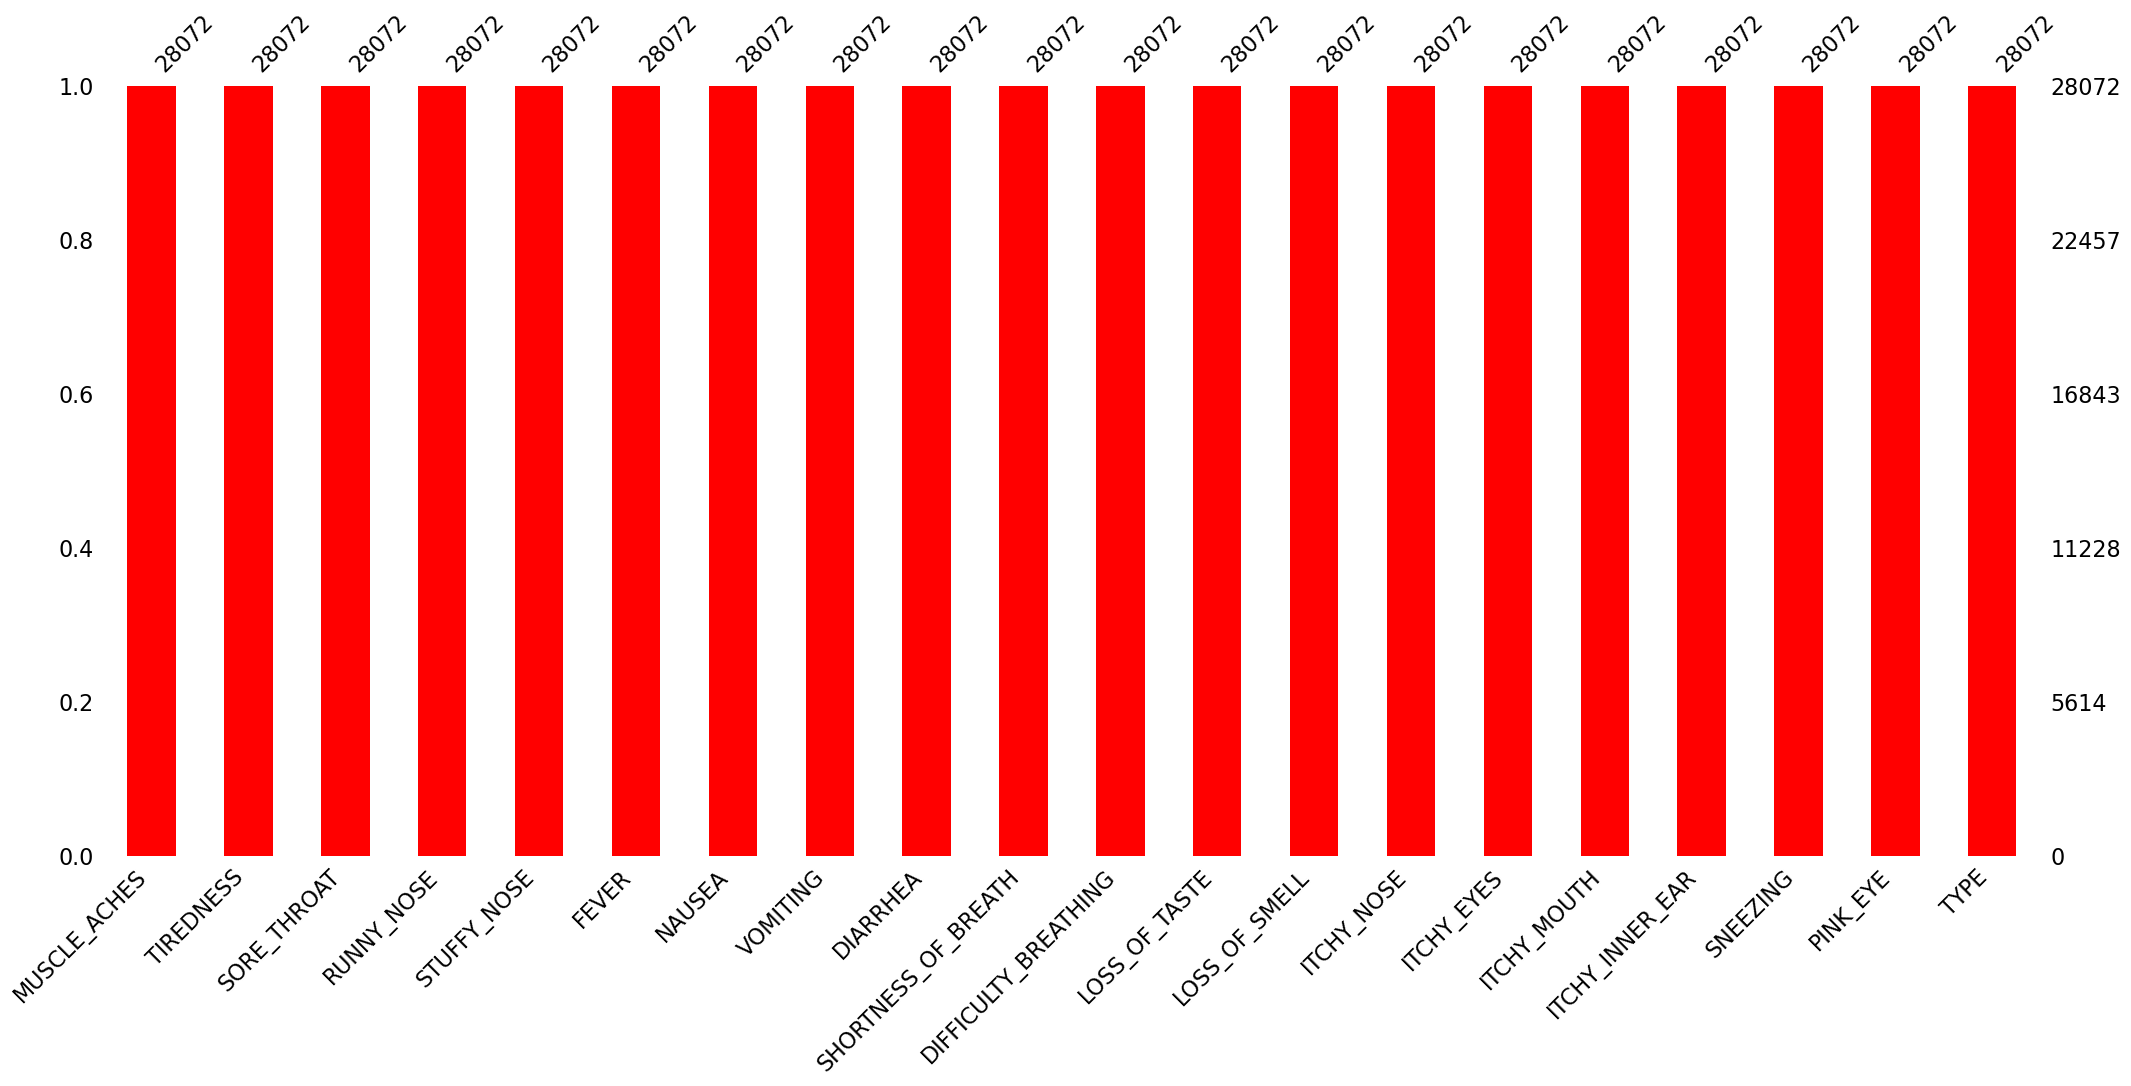

In [10]:
import missingno as msn
msn.bar(df,color="red")

This shows that there is no missing value in the dataset

In [11]:
df.isna()

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28067,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28068,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28069,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28070,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#value counts of null values in each columns
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].isna().value_counts())
    print("")

MUSCLE_ACHES
False    28072
Name: MUSCLE_ACHES, dtype: int64

TIREDNESS
False    28072
Name: TIREDNESS, dtype: int64

SORE_THROAT
False    28072
Name: SORE_THROAT, dtype: int64

RUNNY_NOSE
False    28072
Name: RUNNY_NOSE, dtype: int64

STUFFY_NOSE
False    28072
Name: STUFFY_NOSE, dtype: int64

FEVER
False    28072
Name: FEVER, dtype: int64

NAUSEA
False    28072
Name: NAUSEA, dtype: int64

VOMITING
False    28072
Name: VOMITING, dtype: int64

DIARRHEA
False    28072
Name: DIARRHEA, dtype: int64

SHORTNESS_OF_BREATH
False    28072
Name: SHORTNESS_OF_BREATH, dtype: int64

DIFFICULTY_BREATHING
False    28072
Name: DIFFICULTY_BREATHING, dtype: int64

LOSS_OF_TASTE
False    28072
Name: LOSS_OF_TASTE, dtype: int64

LOSS_OF_SMELL
False    28072
Name: LOSS_OF_SMELL, dtype: int64

ITCHY_NOSE
False    28072
Name: ITCHY_NOSE, dtype: int64

ITCHY_EYES
False    28072
Name: ITCHY_EYES, dtype: int64

ITCHY_MOUTH
False    28072
Name: ITCHY_MOUTH, dtype: int64

ITCHY_INNER_EAR
False    28072
Name: ITC

### Counting Feature Values

In [13]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].value_counts())
    print("")

MUSCLE_ACHES
1    14914
0    13158
Name: MUSCLE_ACHES, dtype: int64

TIREDNESS
1    14921
0    13151
Name: TIREDNESS, dtype: int64

SORE_THROAT
1    14898
0    13174
Name: SORE_THROAT, dtype: int64

RUNNY_NOSE
0    14205
1    13867
Name: RUNNY_NOSE, dtype: int64

STUFFY_NOSE
0    14222
1    13850
Name: STUFFY_NOSE, dtype: int64

FEVER
1    14465
0    13607
Name: FEVER, dtype: int64

NAUSEA
1    14414
0    13658
Name: NAUSEA, dtype: int64

VOMITING
1    14426
0    13646
Name: VOMITING, dtype: int64

DIARRHEA
1    14379
0    13693
Name: DIARRHEA, dtype: int64

SHORTNESS_OF_BREATH
1    14398
0    13674
Name: SHORTNESS_OF_BREATH, dtype: int64

DIFFICULTY_BREATHING
1    14423
0    13649
Name: DIFFICULTY_BREATHING, dtype: int64

LOSS_OF_TASTE
0    17460
1    10612
Name: LOSS_OF_TASTE, dtype: int64

LOSS_OF_SMELL
0    17448
1    10624
Name: LOSS_OF_SMELL, dtype: int64

ITCHY_NOSE
0    28072
Name: ITCHY_NOSE, dtype: int64

ITCHY_EYES
0    28072
Name: ITCHY_EYES, dtype: int64

ITCHY_MOUTH
0    

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28067     True
28068     True
28069     True
28070     True
28071     True
Length: 28072, dtype: bool

In [15]:
#checking for duplicate
df.duplicated().value_counts()

False    15518
True     12554
dtype: int64

<Axes: >

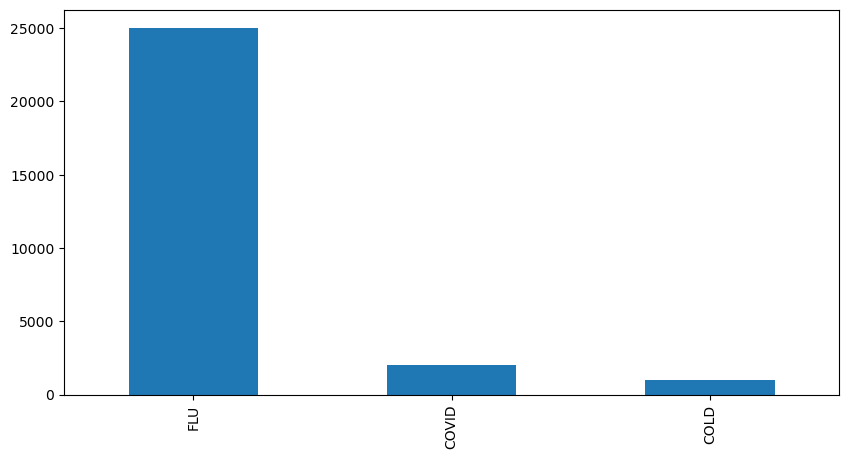

In [16]:
plt.figure(figsize=(10,5))
df['TYPE'].value_counts().plot(kind='bar')

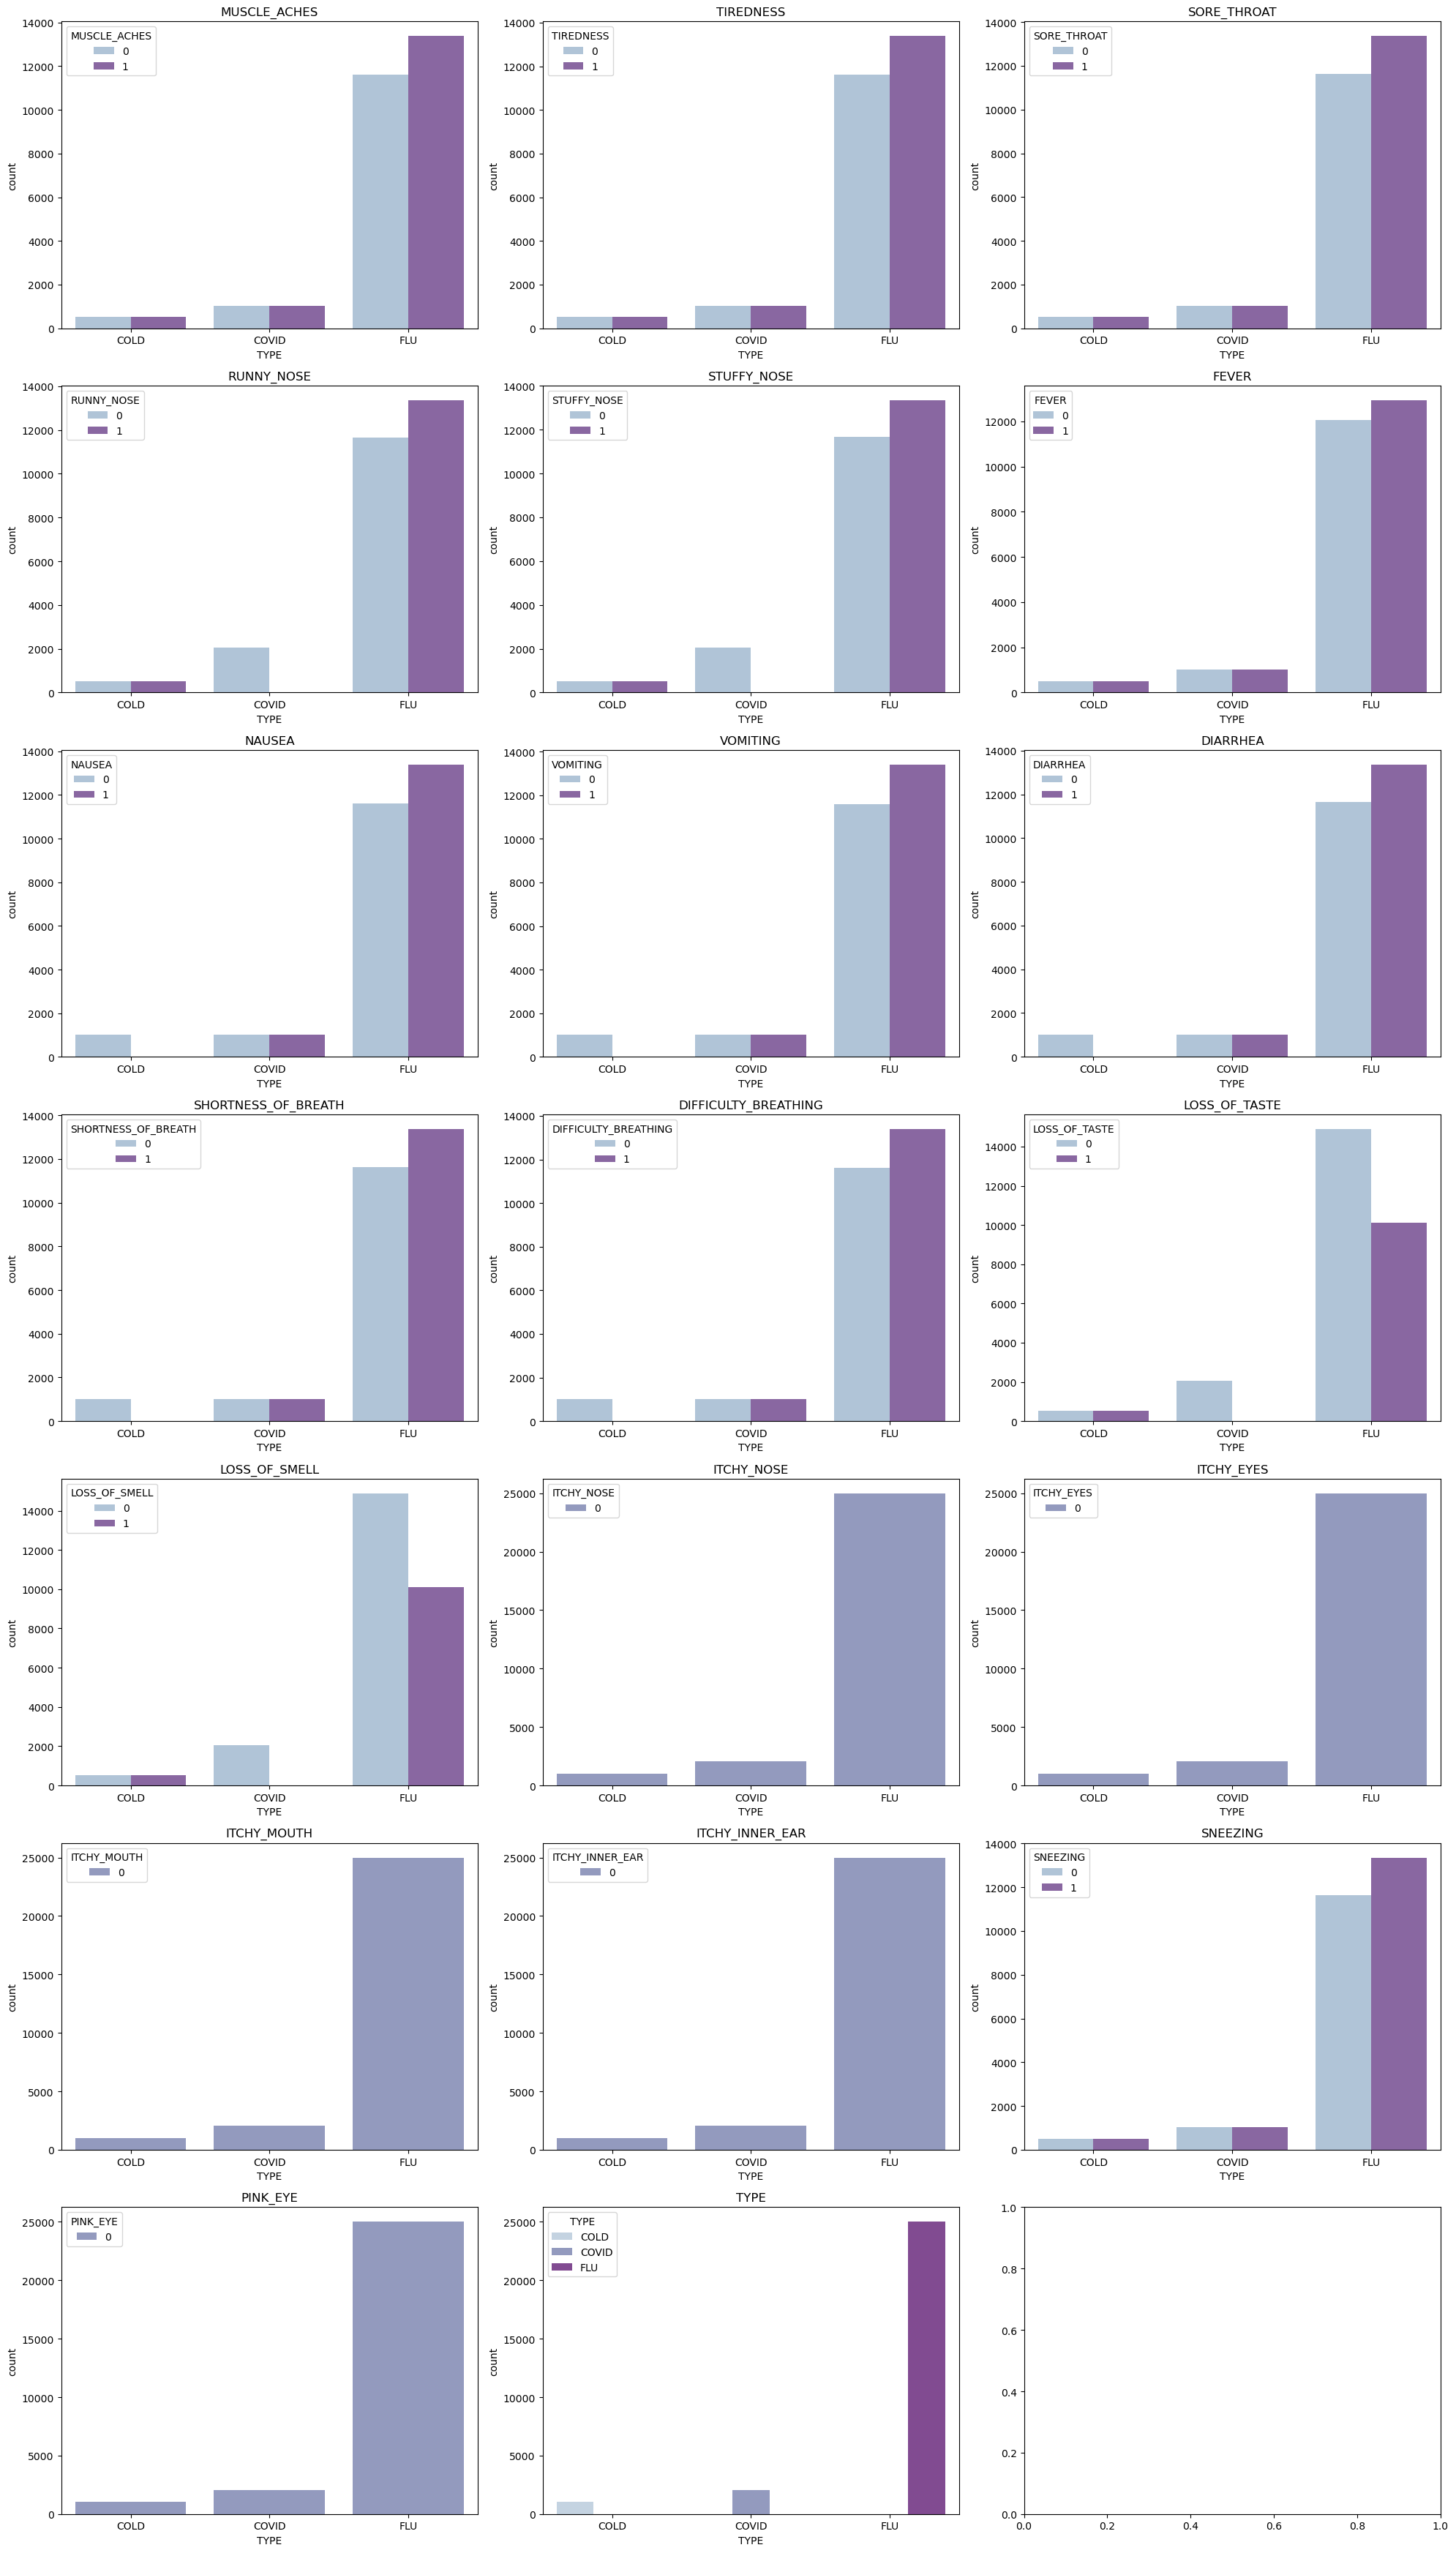

In [17]:
cols = df.columns
num_cols = len(cols)

nrows = (num_cols + 2)//3
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    #sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='TYPE', data=df, hue=col, palette='BuPu',ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

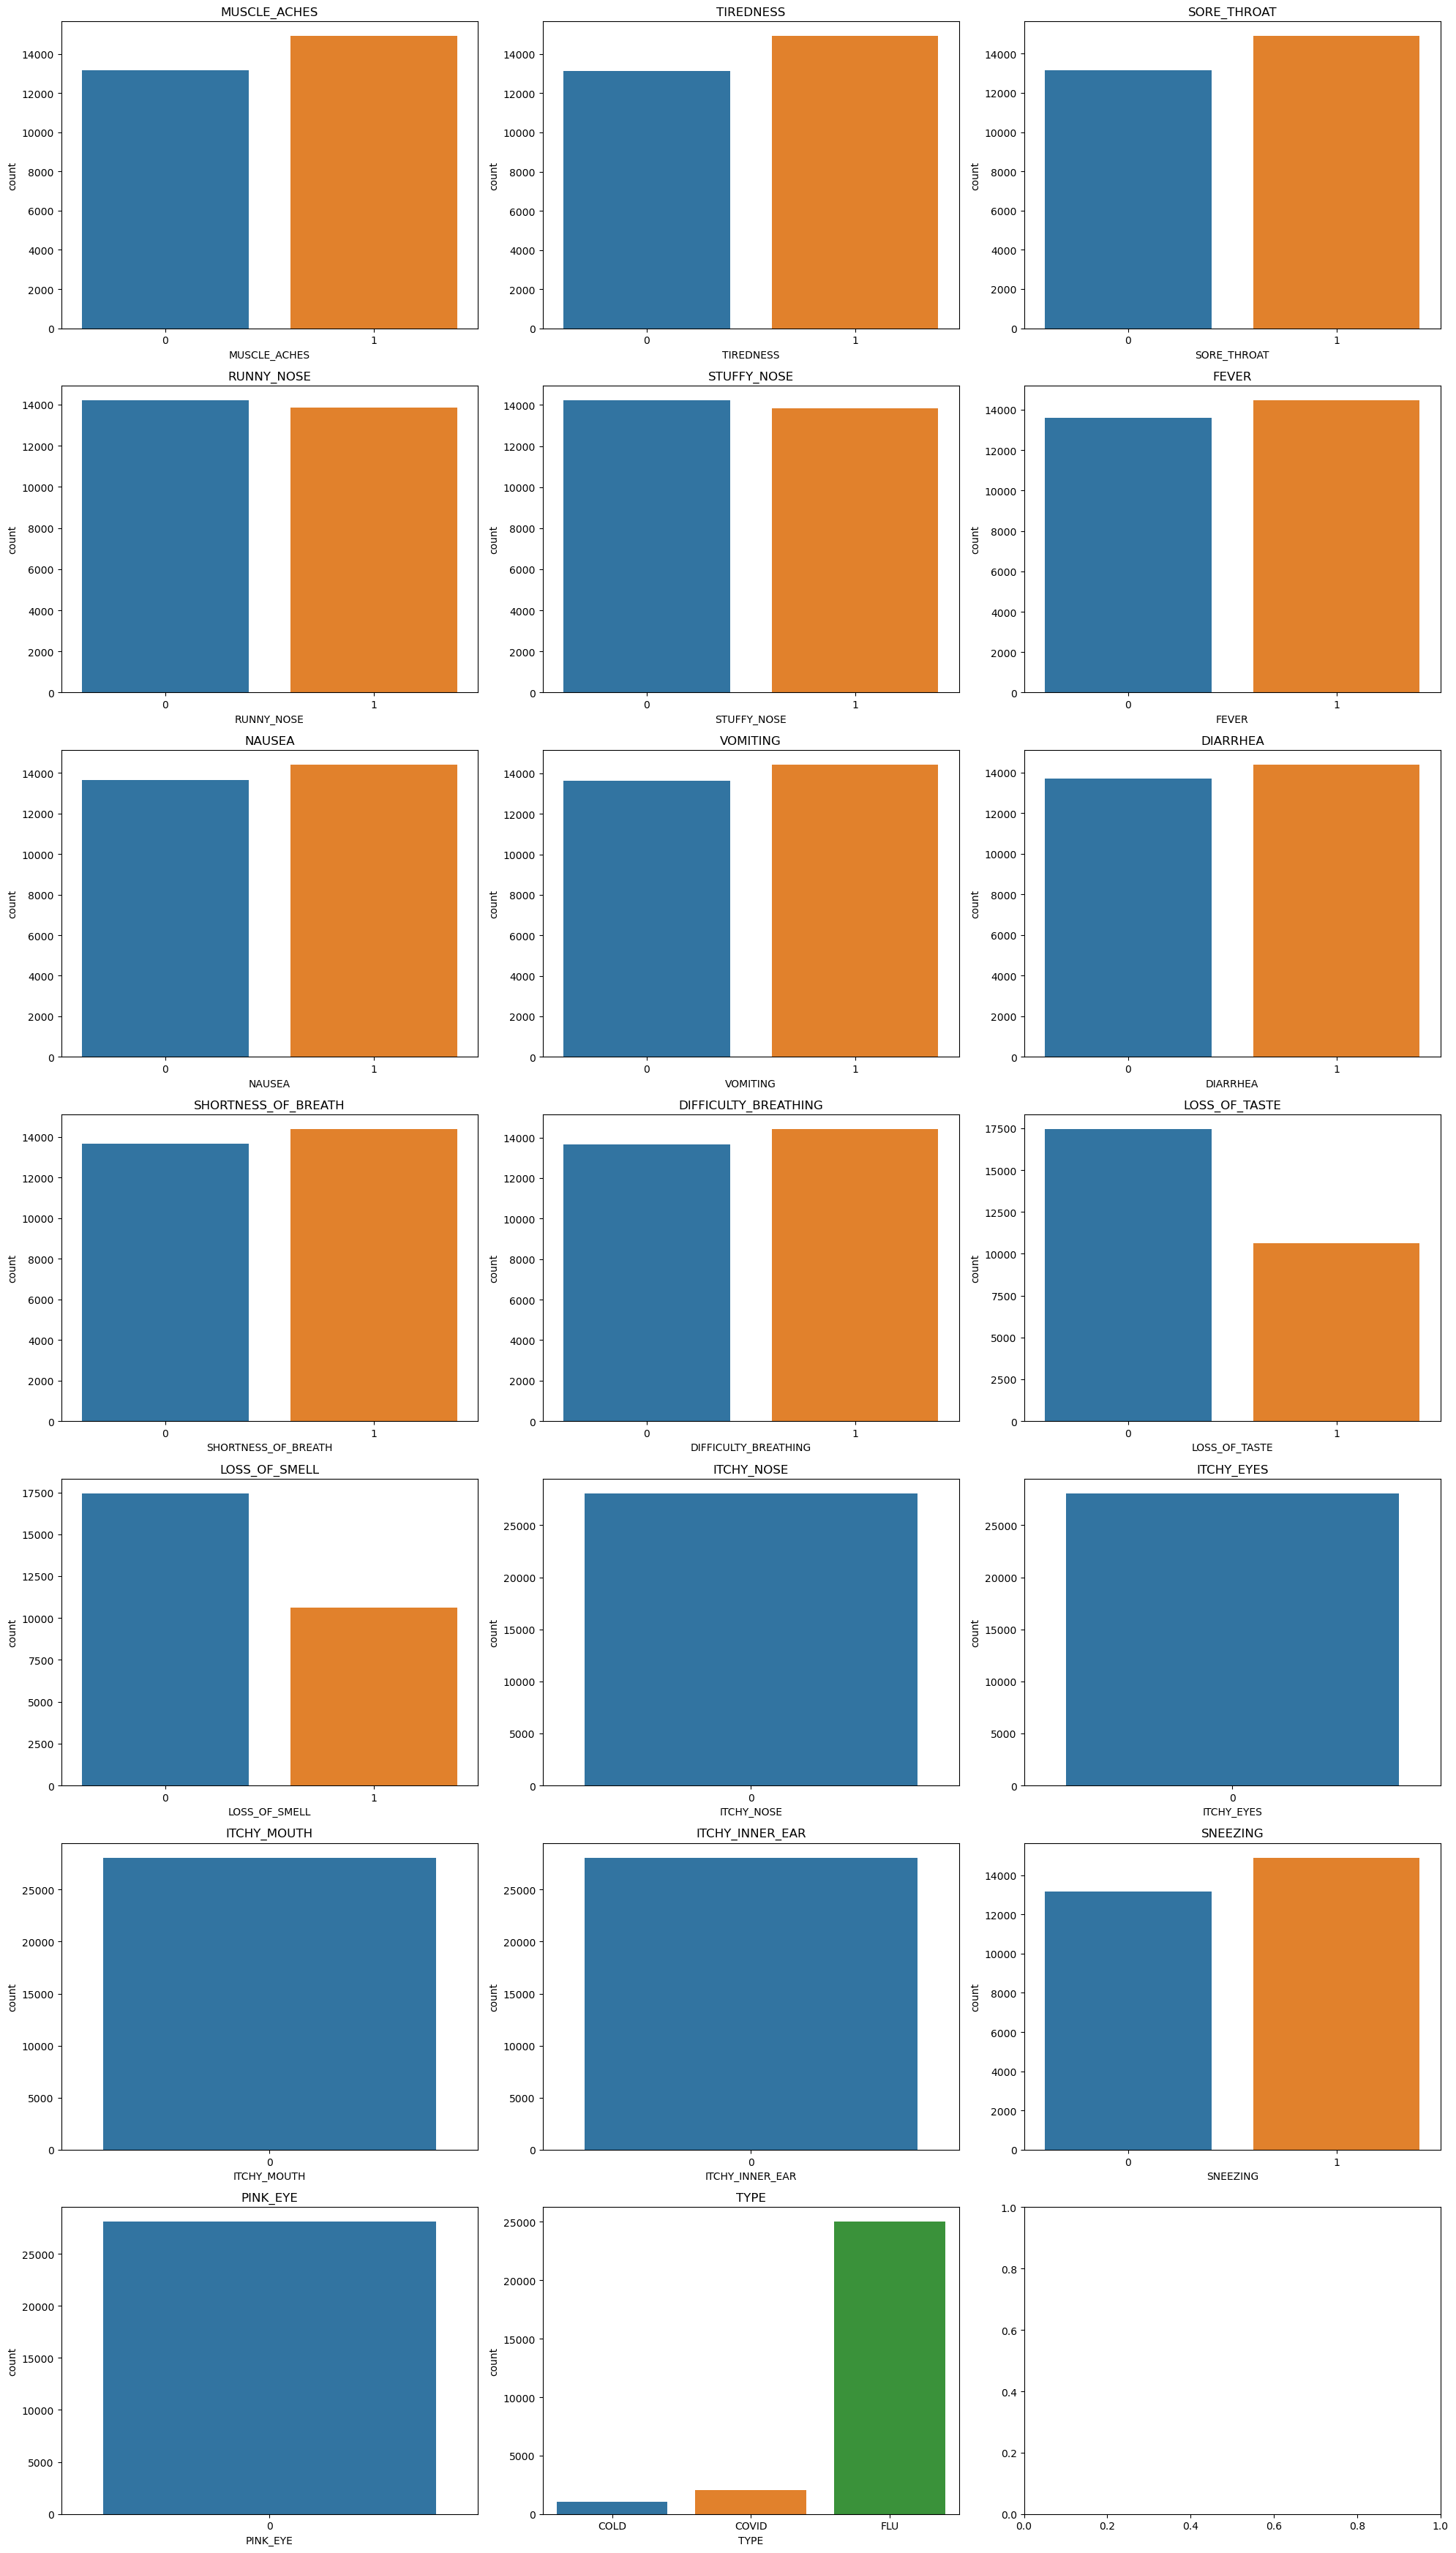

In [18]:
cols = df.columns
num_cols = len(cols)
nrows = np.ceil(num_cols/3).astype(int)

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Correlation

In [19]:
df_corr = df.corr()
df_corr

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
MUSCLE_ACHES,1.000000,-0.010755,-0.009578,-0.007455,-0.007165,-0.003845,-0.009829,-0.007312,-0.009887,-0.007473,-0.015083,0.038290,0.039110,NaN,NaN,NaN,NaN,-0.008702,NaN
TIREDNESS,-0.010755,1.000000,-0.013114,-0.005236,-0.006516,-0.005789,-0.010914,-0.009112,-0.007257,-0.005700,-0.009170,0.037607,0.039604,NaN,NaN,NaN,NaN,-0.008518,NaN
SORE_THROAT,-0.009578,-0.013114,1.000000,-0.005898,-0.007323,-0.005381,-0.011654,-0.008994,-0.011143,-0.007157,-0.010195,0.041386,0.033669,NaN,NaN,NaN,NaN,-0.010634,NaN
RUNNY_NOSE,-0.007455,-0.005236,-0.005898,1.000000,0.065040,-0.006760,-0.003168,-0.008147,-0.002271,-0.008456,-0.005655,0.097258,0.096219,NaN,NaN,NaN,NaN,-0.006330,NaN
STUFFY_NOSE,-0.007165,-0.006516,-0.007323,0.065040,1.000000,-0.002517,-0.004205,-0.008043,-0.008443,-0.007356,-0.005978,0.092473,0.095108,NaN,NaN,NaN,NaN,-0.002900,NaN
FEVER,-0.003845,-0.005789,-0.005381,-0.006760,-0.002517,1.000000,-0.000895,-0.003346,-0.004170,-0.004568,-0.001556,0.019672,0.020082,NaN,NaN,NaN,NaN,-0.007657,NaN
NAUSEA,-0.009829,-0.010914,-0.011654,-0.003168,-0.004205,-0.000895,1.000000,0.026772,0.031067,0.029249,0.031840,0.032646,0.032909,NaN,NaN,NaN,NaN,-0.010790,NaN
VOMITING,-0.007312,-0.009112,-0.008994,-0.008147,-0.008043,-0.003346,0.026772,1.000000,0.028908,0.028657,0.028680,0.031686,0.029744,NaN,NaN,NaN,NaN,-0.009271,NaN
DIARRHEA,-0.009887,-0.007257,-0.011143,-0.002271,-0.008443,-0.004170,0.031067,0.028908,1.000000,0.025533,0.029697,0.030914,0.028094,NaN,NaN,NaN,NaN,-0.006138,NaN
SHORTNESS_OF_BREATH,-0.007473,-0.005700,-0.007157,-0.008456,-0.007356,-0.004568,0.029249,0.028657,0.025533,1.000000,0.029732,0.029859,0.031740,NaN,NaN,NaN,NaN,-0.006435,NaN


<Axes: >

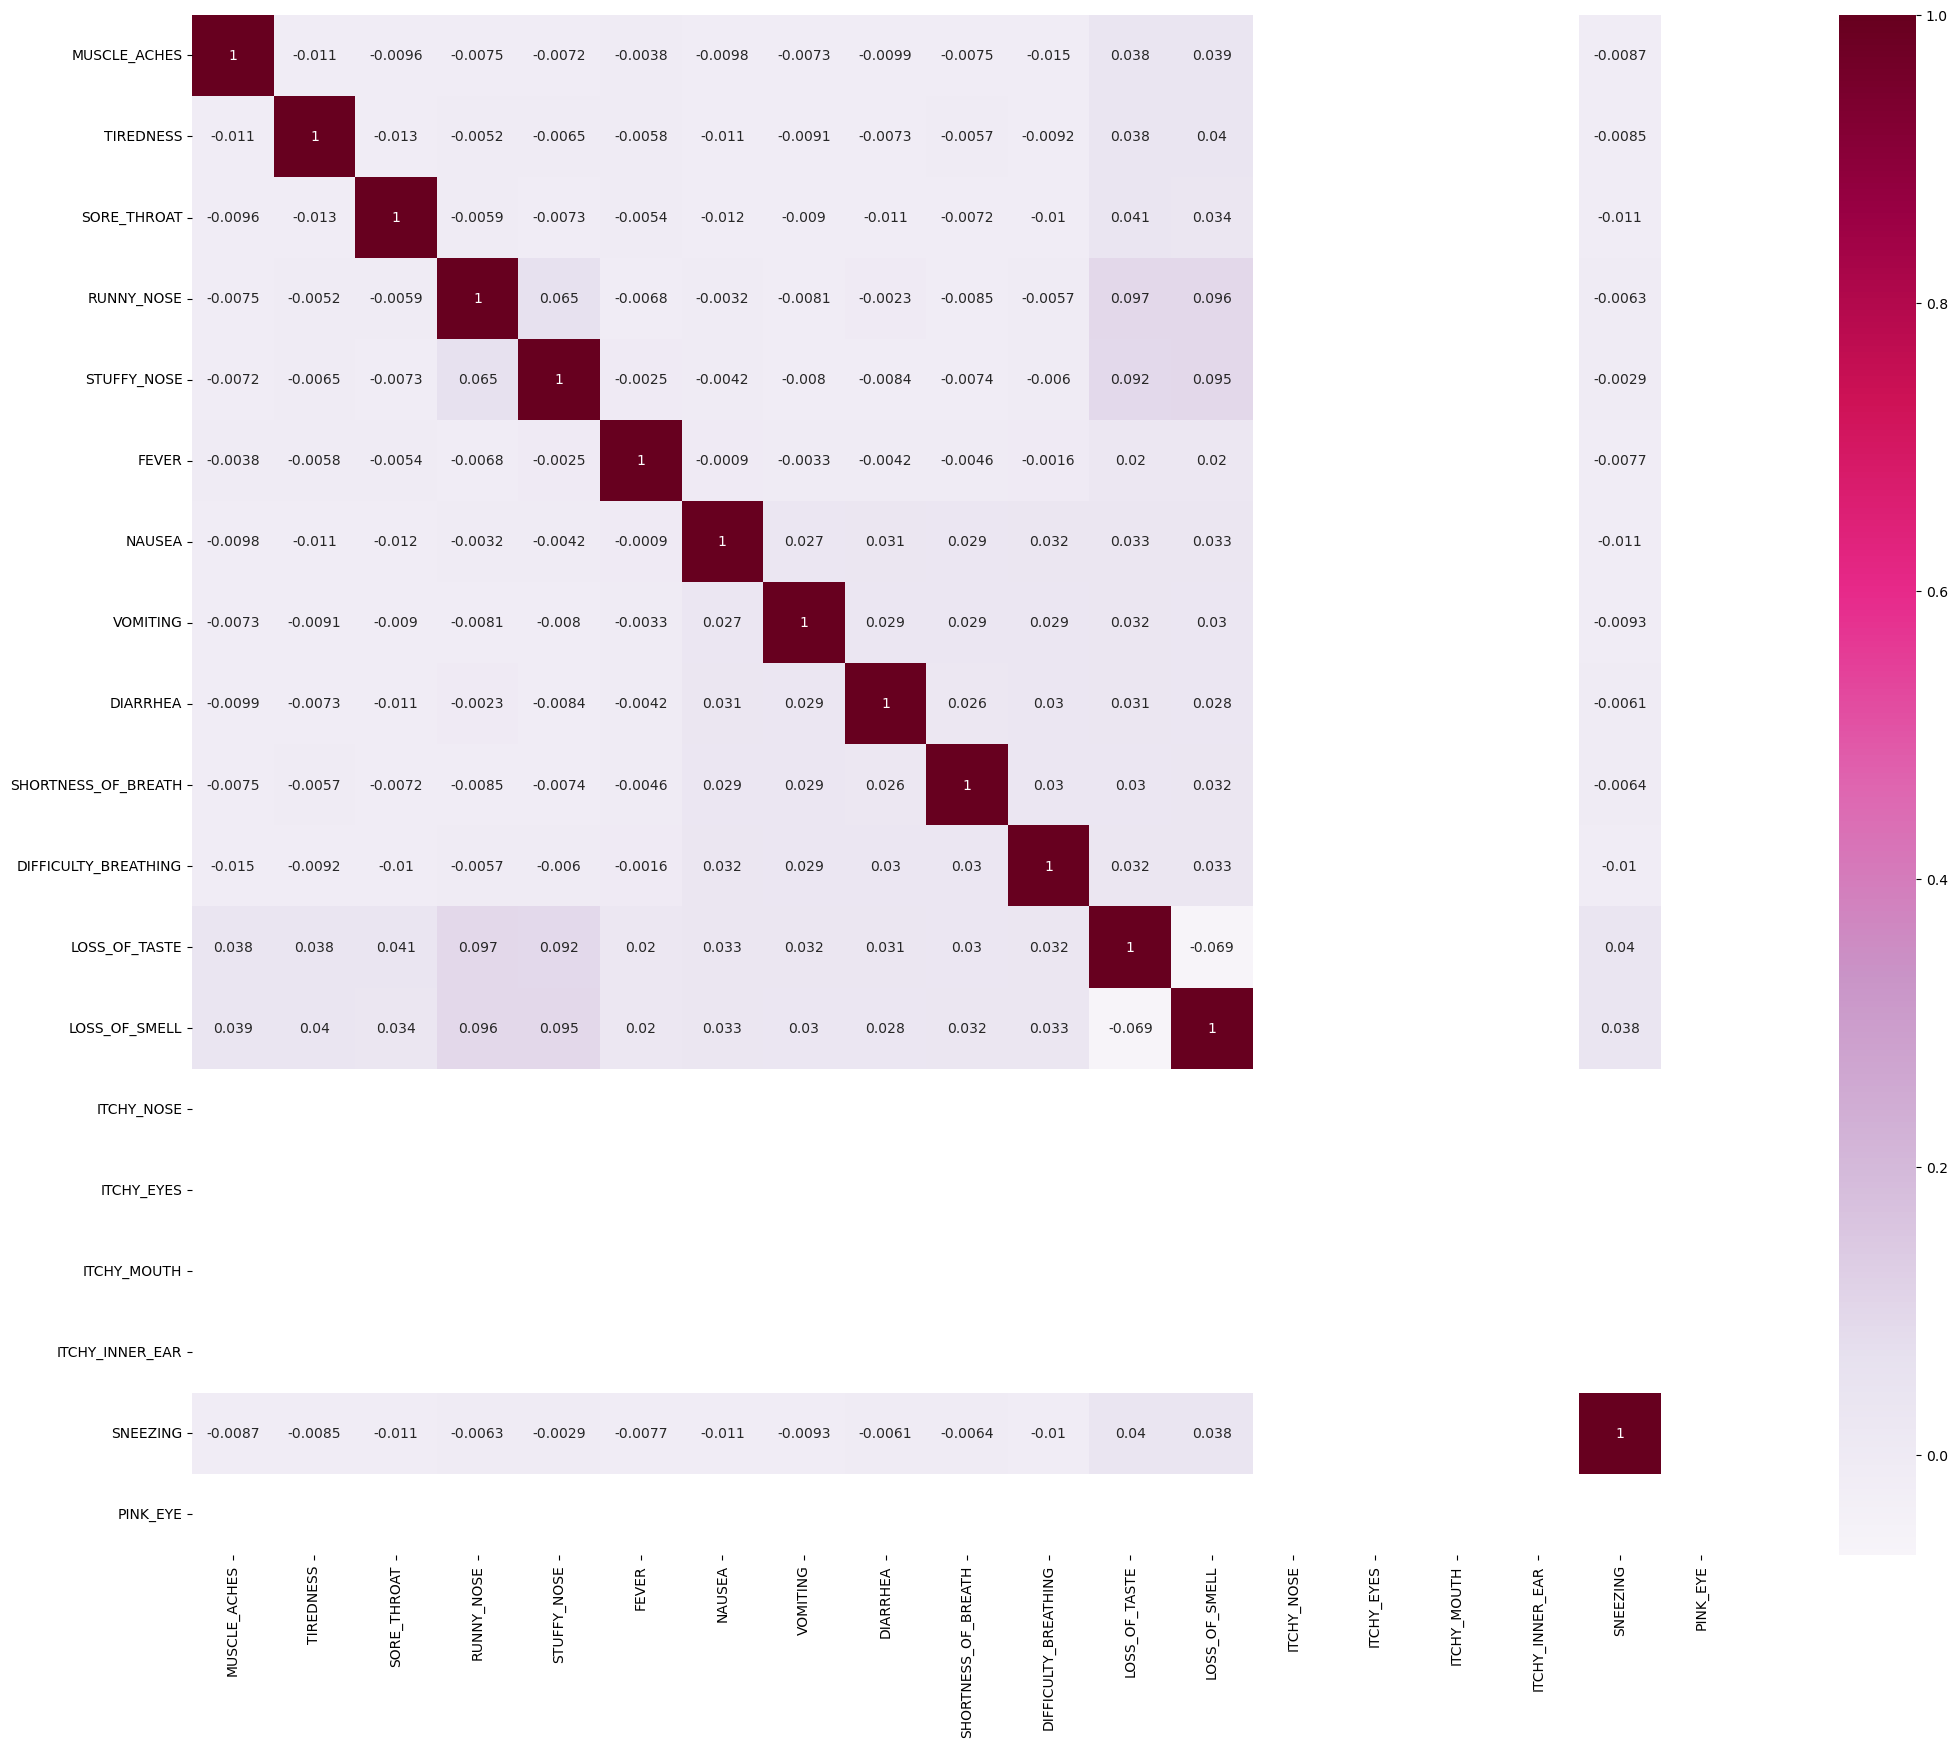

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="PuRd")

In [21]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
col_corr = corr_features = correlation(df, 0.8)
print(col_corr)

set()


In [22]:
df.shape

(28072, 20)

In [23]:
df['TYPE'].unique()

array(['COLD', 'COVID', 'FLU'], dtype=object)

In [24]:
#function to encode categorical variables
def le_encoder(data):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])


In [25]:
le_encoder(df)

In [26]:
df.head()

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
X=df.drop(columns='TYPE', axis=1)
y=df['TYPE']

In [28]:
#Spliting the datset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23861, 19) (4211, 19) (23861,) (4211,)


In [30]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    classification = classification_report(true, predicted)
    return accuracy, classification

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(criterion='entropy', random_state=0),
    "Random Forest Classifiier": RandomForestClassifier(n_estimators= 10, criterion="entropy"),
    "SVM": SVC(kernel='linear')
}
model_list = []
acc_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_classification = evaluate_model(y_train, y_train_pred)

    model_test_accuracy , model_test_classification = evaluate_model(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_accuracy))
    print("- Classification Report:")
    print(model_train_classification)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
    print("- Classification Report:")
    print(model_test_classification)
    
    acc_list.append(model_test_accuracy)
    
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy Score: 0.9141
- Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       889
           1       0.52      0.63      0.57      1742
           2       0.97      0.94      0.95     21230

    accuracy                           0.91     23861
   macro avg       0.73      0.81      0.77     23861
weighted avg       0.92      0.91      0.92     23861

----------------------------------
Model performance for Test set
- Accuracy Score: 0.9038
- Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       135
           1       0.45      0.59      0.51       306
           2       0.96      0.93      0.95      3770

    accuracy                           0.90      4211
   macro avg       0.71      0.78      0.74      4211
weighted avg       0.92      0.90      0.91      4211



Gradient Boosti

In [32]:
pd.DataFrame(list(zip(model_list, acc_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)

,Model Name,Accuracy_Score
4,SVM,0.908098
0,Logistic Regression,0.903823
1,Gradient Boosting Classifier,0.889812
3,Random Forest Classifiier,0.847305
2,Decision Tree Classifier,0.845167


## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( criterion = 'gini', n_estimators=9, max_depth=11)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=9)

In [34]:
# predecting
y_pred =rfc.predict(X_test)

# evaluating
class_labels = ['Cold', 'Covid', 'Flu']
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()
print(classification_report(y_test,y_pred,target_names=class_labels))

88.41130372833057

              precision    recall  f1-score   support

        Cold       0.71      0.57      0.63       135
       Covid       0.18      0.09      0.12       306
         Flu       0.92      0.96      0.94      3770

    accuracy                           0.88      4211
   macro avg       0.60      0.54      0.56      4211
weighted avg       0.86      0.88      0.87      4211



## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=14,)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

In [36]:
class_labels = ['Cold', 'Covid', 'Flu']
y_pred = dtree.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()
print(classification_report(y_test,y_pred,target_names=class_labels))

84.51674186654002

              precision    recall  f1-score   support

        Cold       0.58      0.64      0.61       135
       Covid       0.19      0.25      0.21       306
         Flu       0.93      0.90      0.91      3770

    accuracy                           0.85      4211
   macro avg       0.57      0.60      0.58      4211
weighted avg       0.86      0.85      0.85      4211



## Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [38]:
class_labels = ['Cold', 'Covid', 'Flu']
y_pred = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()
print(classification_report(y_test,y_pred,target_names=class_labels))

90.16860603182141

              precision    recall  f1-score   support

        Cold       0.70      0.81      0.75       135
       Covid       0.45      0.65      0.53       306
         Flu       0.97      0.93      0.95      3770

    accuracy                           0.90      4211
   macro avg       0.70      0.80      0.74      4211
weighted avg       0.92      0.90      0.91      4211



## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.2)
lr.fit(X_train, y_train)

LogisticRegression(C=0.2)

In [40]:
class_labels = ['Cold', 'Covid', 'Flu']
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()
print(classification_report(y_test,y_pred,target_names=class_labels))

90.90477321301353

              precision    recall  f1-score   support

        Cold       0.71      0.79      0.74       135
       Covid       0.47      0.42      0.45       306
         Flu       0.95      0.95      0.95      3770

    accuracy                           0.91      4211
   macro avg       0.71      0.72      0.71      4211
weighted avg       0.91      0.91      0.91      4211



## Support Vector Machine

In [41]:
from sklearn.svm import SVC
svm = SVC(C=0.04, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.04, kernel='linear')

In [42]:
class_labels = ['Cold', 'Covid', 'Flu']
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()
print(classification_report(y_test,y_pred,target_names=class_labels))

91.37971978152459

              precision    recall  f1-score   support

        Cold       0.67      1.00      0.80       135
       Covid       0.00      0.00      0.00       306
         Flu       0.93      0.98      0.95      3770

    accuracy                           0.91      4211
   macro avg       0.53      0.66      0.59      4211
weighted avg       0.85      0.91      0.88      4211



## Making a Prediction System

In [43]:
X_test.head()

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
11813,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0
20703,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
16047,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
17887,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0
9693,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0


In [44]:
X_test[:1]

,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
11813,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0


In [45]:
svm.predict(X_test[:1])

array([2])

In [47]:
df.loc[11813]

MUSCLE_ACHES            1
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              1
STUFFY_NOSE             0
FEVER                   1
NAUSEA                  1
VOMITING                1
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    1
LOSS_OF_TASTE           1
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                1
PINK_EYE                0
TYPE                    2
Name: 11813, dtype: int64

In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svm.predict(X_test))
cm

array([[ 135,    0,    0],
       [   9,    0,  297],
       [  57,    0, 3713]], dtype=int64)

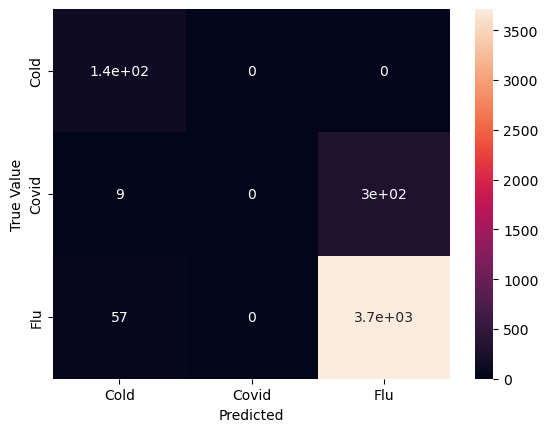

In [49]:
#plot the graph
class_labels = ['Cold', 'Covid', 'Flu']
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [60]:
input_data = (1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0)
disease_mapping = {
    0: 'Cold',
    1: 'Covid',
    2: 'Flu'
}
#convert input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array since we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm.predict(input_data_reshaped)

predicted_disease = disease_mapping[prediction[0]]

if (prediction[0]==0):
    print(f'This patient does not have a Communicable Disease - {predicted_disease}')
else:
    print(f'This patient has a Communicable Disease - {predicted_disease}')

This patient has a Communicable Disease - Flu


In [51]:
for column in X.columns:
    print(column)

MUSCLE_ACHES
TIREDNESS
SORE_THROAT
RUNNY_NOSE
STUFFY_NOSE
FEVER
NAUSEA
VOMITING
DIARRHEA
SHORTNESS_OF_BREATH
DIFFICULTY_BREATHING
LOSS_OF_TASTE
LOSS_OF_SMELL
ITCHY_NOSE
ITCHY_EYES
ITCHY_MOUTH
ITCHY_INNER_EAR
SNEEZING
PINK_EYE


## Feature Importance

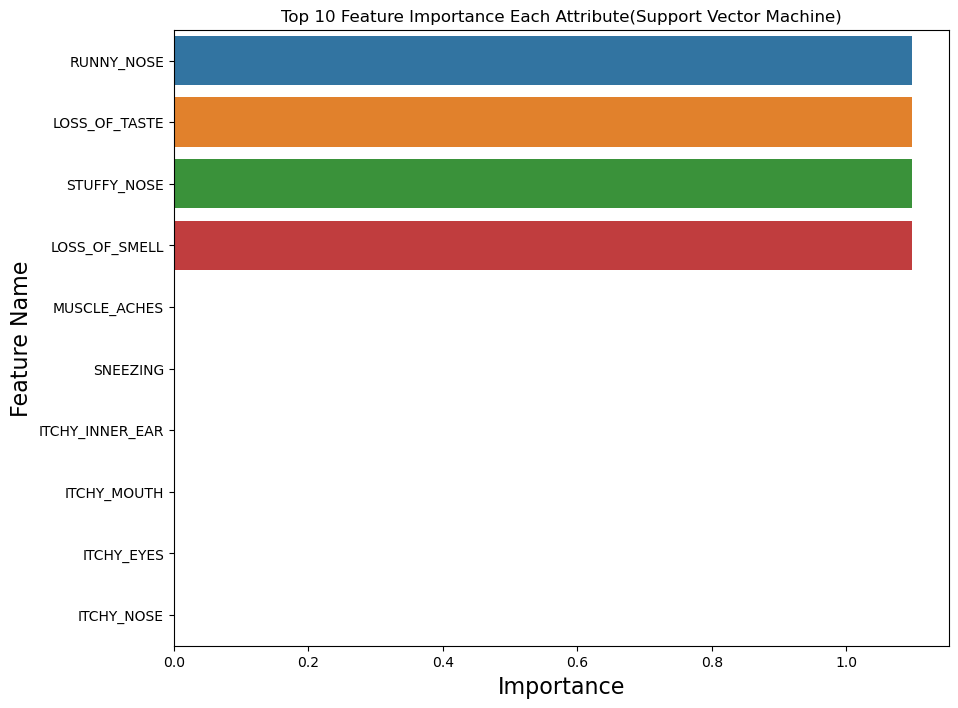

In [52]:
# Access the feature weights
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance":svm.coef_[0]
})

fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute(Support Vector Machine)")
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

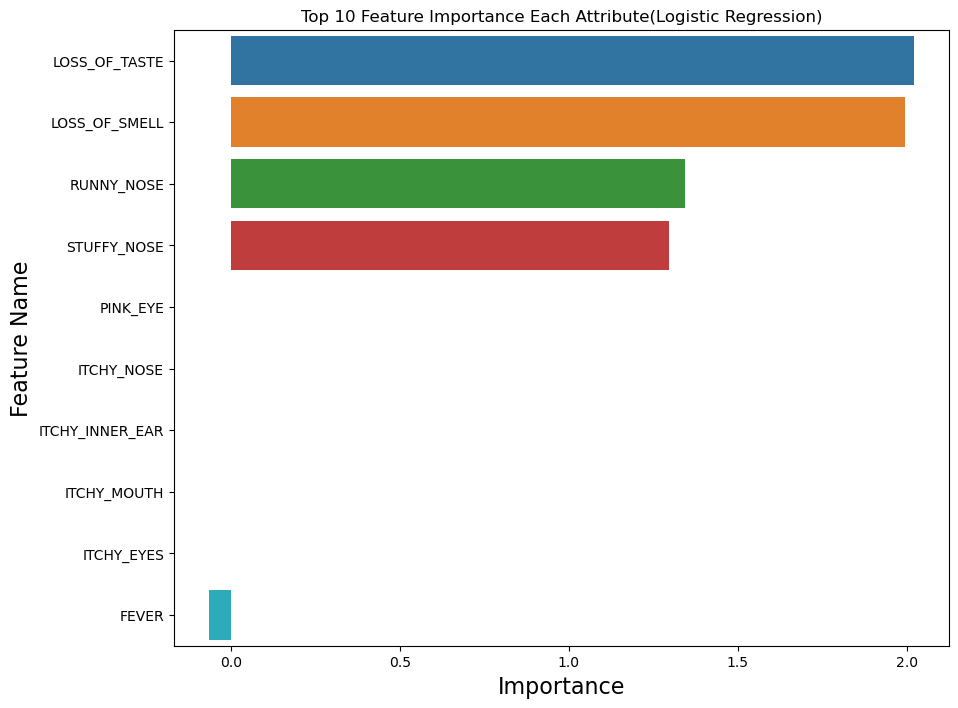

In [53]:
# Access the feature weights
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance":lr.coef_[0]
})

fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute(Logistic Regression)")
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

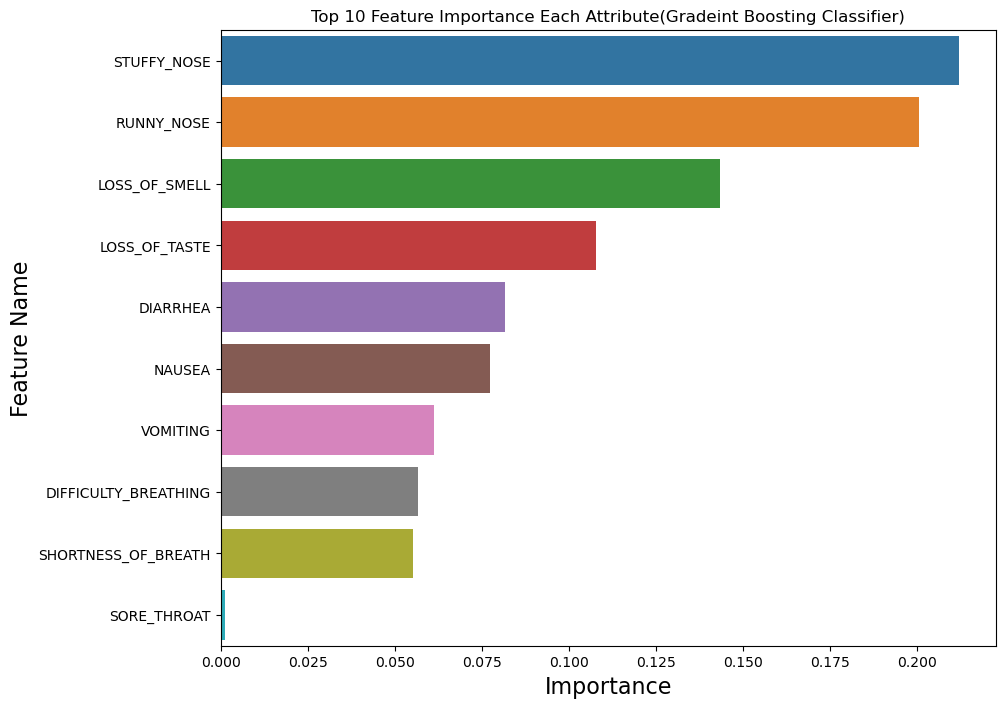

In [54]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance":gbc.feature_importances_
})
fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute(Gradeint Boosting Classifier)")
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

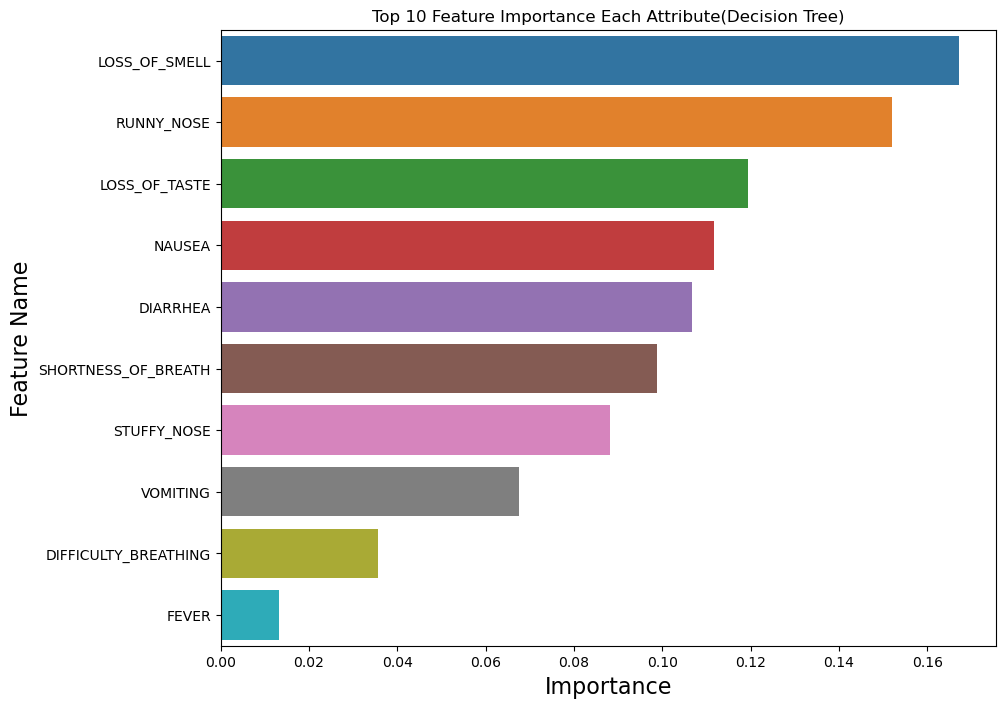

In [55]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance":dtree.feature_importances_
})
fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute(Decision Tree)")
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

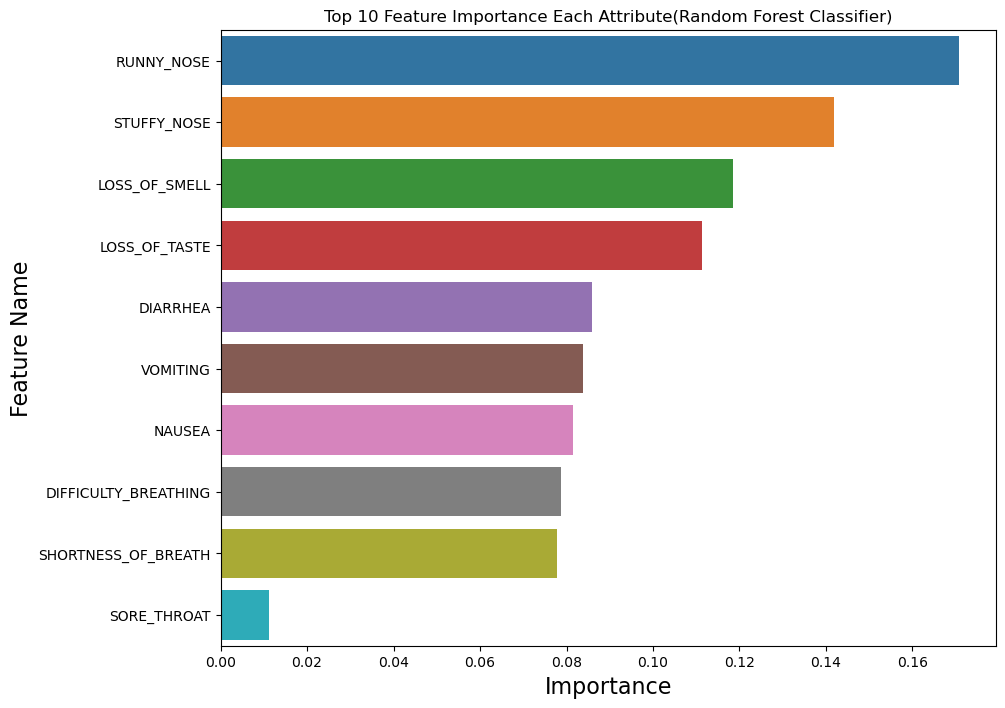

In [56]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance":rfc.feature_importances_
})
fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 Feature Importance Each Attribute(Random Forest Classifier)")
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## Saving the Model

In [57]:
import joblib
import pickle

In [58]:
joblib.dump(svm, 'model.pkl')

['model.pkl']

In [59]:
with open('model1.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)